# Actividad:
Ejercicio práctico para implementar una red neuronal para regresión utilizando Keras.



---

Por: Ángela Daniela Córdoba Álvarez


---



In [1]:
# Importar librerías necesarias
import keras # Crear modelo de red neuronal
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd # Manipular datos tabulares
import matplotlib.pyplot as plt # Trazar gráficos

In [2]:
# Cargar el conjunto de datos de viviendas de California
housing = fetch_california_housing()

In [3]:
# Crear conjuntos de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Imprimir
print('X_train:', X_train.shape)
print('X_valid:', X_valid.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_valid:', y_valid.shape)
print('y_test:', y_test.shape)

X_train: (11610, 8)
X_valid: (3870, 8)
X_test: (5160, 8)
y_train: (11610,)
y_valid: (3870,)
y_test: (5160,)


In [4]:
# Escalar datos
# Estandarizar los datos para que tengan media de 0 y desviación estándar de 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [5]:
# Crear el modelo de red neuronal
'''
Usar modelo secuencial de Keras para crear una red neuronal con una capa densa
de 30 neuronas y una función de activación ReLU, junto con una capa de salida de
1 sola neurona (pues se está haciendo regresión).
'''
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [6]:
# Compilar el modelo
'''
Se especifica la función de pérdida como 'mean_squared_error' para regresión, el
optimizador como 'sgd' (Stochastic Gradient Descent) y las métricas como
'mean_absolute_percentage_error' y 'root_mean_squared_error' para evaluar el
rendimiento del modelo.
'''
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])

In [7]:
# Entrenar el modelo durante 10 épocas junto con los datos de validación
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 5s 9ms/step - loss: 0.8933 - root_mean_squared_error: 0.9451 - mean_absolute_percentage_error: 39.7402 - val_loss: 0.5922 - val_root_mean_squared_error: 0.7695 - val_mean_absolute_percentage_error: 31.4354
Epoch 2/10
363/363 [==============================] - 4s 10ms/step - loss: 0.5269 - root_mean_squared_error: 0.7259 - mean_absolute_percentage_error: 30.7102 - val_loss: 0.5127 - val_root_mean_squared_error: 0.7160 - val_mean_absolute_percentage_error: 30.0335
Epoch 3/10
363/363 [==============================] - 3s 7ms/step - loss: 0.4798 - root_mean_squared_error: 0.6927 - mean_absolute_percentage_error: 29.0344 - val_loss: 0.4892 - val_root_mean_squared_error: 0.6995 - val_mean_absolute_percentage_error: 29.2199
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4532 - root_mean_squared_error: 0.6732 - mean_absolute_percentage_error: 28.3511 - val_loss: 0.4730 - val_root_mean_squared_error: 0.6877 - val

<Axes: >

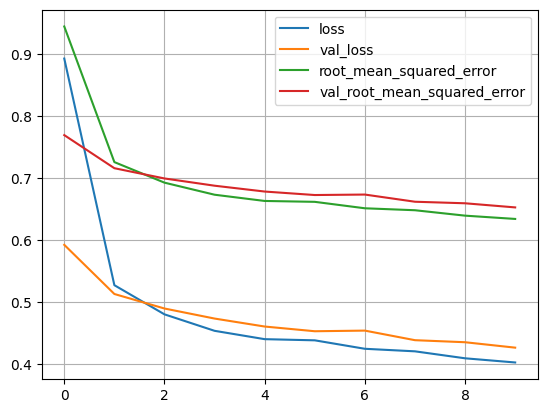

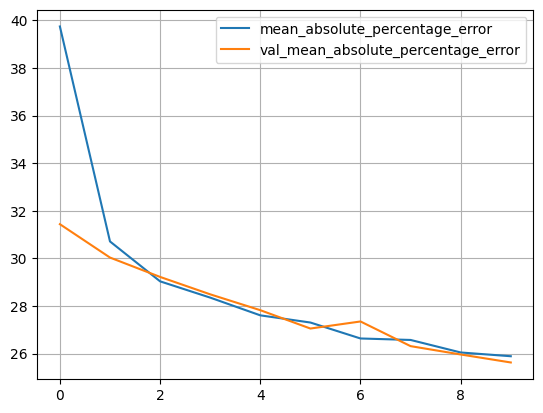

In [8]:
# Graficar todo el historial de entrenamiento del modelo
'''
Se usa pandas para convertir el historial del modelo en un DataFrame
y se trazan las curvas de pérdida y métricas de entrenamiento y validación.
'''
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)

dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)

In [9]:
# Evaluar el modelo
'''
El código termina por crear, entrenar, evaluar y trazar el rendimiento de una
red neuronal para predecir los precios de las viviendas en California.
'''

# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("Pérdida en el conjunto de entrenamiento:", loss)
print("RMSE en el conjunto de entrenamiento:", RMSE)
print("MAPE en el conjunto de entrenamiento:", MAPE)

# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("Pérdida en el conjunto de validación:", loss)
print("RMSE en el conjunto de validación:", RMSE)
print("MAPE en el conjunto de validación:", MAPE)

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)

363/363 [==============================] - 1s 3ms/step - loss: 0.3986 - root_mean_squared_error: 0.6313 - mean_absolute_percentage_error: 25.4865
Evaluar el modelo en el conjunto de entrenamiento
Pérdida en el conjunto de entrenamiento: 0.3985556662082672
RMSE en el conjunto de entrenamiento: 0.6313126683235168
MAPE en el conjunto de entrenamiento: 25.486509323120117
121/121 [==============================] - 0s 2ms/step - loss: 0.4260 - root_mean_squared_error: 0.6527 - mean_absolute_percentage_error: 25.6263
Evaluar el modelo en el conjunto de validación
Pérdida en el conjunto de validación: 0.4259665012359619
RMSE en el conjunto de validación: 0.6526610851287842
MAPE en el conjunto de validación: 25.626346588134766
162/162 [==============================] - 0s 1ms/step - loss: 0.4000 - root_mean_squared_error: 0.6325 - mean_absolute_percentage_error: 25.2538
Evaluar el modelo en el conjunto de prueba
Pérdida en el conjunto de prueba: 0.40004146099090576
RMSE en el conjunto de prueba

## Preguntas de comprensión


1.    **¿Qué conjunto de datos se utiliza en este código y qué problema de aprendizaje automático se aborda?**

>> El conjunto de datos utlizado en el código presentado anteriormente es el del precio de viviendas en California ('fetch_california_housing'). Por otro, el problema de aprendizaje automático abordado es de **regresión**, ya que el objetivo es predecir el valor promedio que tienen las casas en diferentes partes de California.


2.   **¿Qué hace la función *train_test_split()* de scikit-learn y por qué se utiliza en este código?**

>> Esta función y, en este caso, lo que hace es dividir los datos en 3 conjuntos: entrenamiento, validación y prueba.

3. **¿Por qué es importante estandarizar los datos antes de entrenar un modelo de redes neuronales?**

>> Es importante porque así se asegura de que todas las características tengan una media de 0 y una desviación estándar de 1. El que tenga estos valores permite que la red neuronal se entrene de forma eficiente evitando problemas mayores como sobrecarga de activaciones.

4. **¿Qué arquitectura de red neuronal se utiliza en este código y cuántas capas tiene?**

>> Se usa una arquitectura de red neuronal secuencial. Tiene 2 capas principales; en la primera (que es la capa densa) hay 30 neuronas y una función de activación ReLU, y la segunda es una capa de salida con una sola neurona (lo cual es útil para realizar regresión).

5. **¿Qué función de activación se utiliza en la capa oculta de la red neuronal y por qué se elige esa función?**

>> Se usa la función de activación ReLU (Rectified Linear Unit) porque ayuda a mitigar el problema del gradiente desaparecido.

6. **¿Qué función de pérdida se utiliza para compilar el modelo y qué métricas se utilizan para evaluar su rendimiento?**

>> La función de pérdida usada es *'mean_squared_error'* (error cuadrático medio), que sirve justamente para problemas de regresión.

>> Y las métriccas son 2: *'root_mean_squared_error'* (RMSE, raíz cuadrada del error cuadrático medio), que facilita el medir la desviación estándar de los residuos (que son los errores); y *'mean_absolute_percentage_error'* (MAPE, error porcentual absoluto medio), que sirve para medir la precisión relativa del modelo de entrenamiento.

7. **¿Cuántas épocas se utilizan para entrenar el modelo y por qué se elige ese número?**

>> Se usan 10 épocas y la razón es que sirve para inicialmente observar el desempeño o rendimiento del modelo.




## Ejercicios de exploración

In [10]:
from keras import models, layers, optimizers, metrics
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

#### Modificar el número de neuronas en la capa oculta de la red neuronal y observar cómo afecta el rendimiento del modelo:

In [11]:
# Crear el modelo de red neuronal con 50 neuronas en la capa oculta
model_50_neurons = models.Sequential([
    layers.Dense(50, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(1)
])

# Compilar el modelo
model_50_neurons.compile(loss='mean_squared_error',
                         optimizer=optimizers.SGD(),
                         metrics=[metrics.RootMeanSquaredError(),
                                  'mean_absolute_percentage_error'])

# Entrenar el modelo durante 10 épocas junto con los datos de validación
history_50_neurons = model_50_neurons.fit(X_train, y_train,
                                          epochs=10,
                                          validation_data=(X_valid, y_valid))

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model_50_neurons.evaluate(X_test, y_test)
print("Modelo con 50 neuronas en la capa oculta")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.7929 - root_mean_squared_error: 0.8904 - mean_absolute_percentage_error: 36.5801 - val_loss: 0.6018 - val_root_mean_squared_error: 0.7758 - val_mean_absolute_percentage_error: 31.7788
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6136 - root_mean_squared_error: 0.7833 - mean_absolute_percentage_error: 29.6773 - val_loss: 0.6032 - val_root_mean_squared_error: 0.7767 - val_mean_absolute_percentage_error: 33.0314
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4621 - root_mean_squared_error: 0.6798 - mean_absolute_percentage_error: 28.0273 - val_loss: 0.4643 - val_root_mean_squared_error: 0.6814 - val_mean_absolute_percentage_error: 27.6087
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4420 - root_mean_squared_error: 0.6649 - mean_absolute_percentage_error: 27.2061 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6730 - val_

#### Experimentar con diferentes optimizadores, como "adam" o "rmsprop", y observar cómo afectan el rendimiento del modelo:

In [12]:
# Crear el modelo de red neuronal con el optimizador 'adam'
model_adam = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(1)
])

# Compilar el modelo
model_adam.compile(loss='mean_squared_error',
                   optimizer='adam',
                   metrics=[metrics.RootMeanSquaredError(),
                            'mean_absolute_percentage_error'])

# Entrenar el modelo durante 10 épocas junto con los datos de validación
history_adam = model_adam.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_valid, y_valid))

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model_adam.evaluate(X_test, y_test)
print("Modelo con optimizador 'adam'")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.4699 - root_mean_squared_error: 1.2124 - mean_absolute_percentage_error: 44.0251 - val_loss: 0.8188 - val_root_mean_squared_error: 0.9049 - val_mean_absolute_percentage_error: 34.0676
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5981 - root_mean_squared_error: 0.7734 - mean_absolute_percentage_error: 32.6949 - val_loss: 0.5807 - val_root_mean_squared_error: 0.7620 - val_mean_absolute_percentage_error: 29.8068
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5033 - root_mean_squared_error: 0.7094 - mean_absolute_percentage_error: 29.7486 - val_loss: 0.5211 - val_root_mean_squared_error: 0.7218 - val_mean_absolute_percentage_error: 29.1339
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4577 - root_mean_squared_error: 0.6766 - mean_absolute_percentage_error: 28.1618 - val_loss: 0.4678 - val_root_mean_squared_error: 0.6839 - val_

#### Agregar una capa de regularización, como Dropout, a la red neuronal y observar cómo afecta el rendimiento del modelo:

In [13]:
# Crear el modelo de red neuronal con una capa de Dropout reducida y optimizador 'adam'
model_dropout = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dropout(0.1),  # Reducir la tasa de Dropout a 0.1
    layers.Dense(1)
])

# Compilar el modelo con optimizador 'adam'
model_dropout.compile(loss='mean_squared_error',
                      optimizer='adam',
                      metrics=[metrics.RootMeanSquaredError(),
                               'mean_absolute_percentage_error'])

# Entrenar el modelo durante 10 épocas junto con los datos de validación
history_dropout = model_dropout.fit(X_train, y_train,
                                    epochs=10,
                                    validation_data=(X_valid, y_valid))

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model_dropout.evaluate(X_test, y_test)
print("Modelo con capa de Dropout y optimizador 'adam'")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.6931 - root_mean_squared_error: 1.3012 - mean_absolute_percentage_error: 47.9504 - val_loss: 0.7051 - val_root_mean_squared_error: 0.8397 - val_mean_absolute_percentage_error: 35.2089
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6949 - root_mean_squared_error: 0.8336 - mean_absolute_percentage_error: 35.4673 - val_loss: 0.5976 - val_root_mean_squared_error: 0.7731 - val_mean_absolute_percentage_error: 29.5319
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5736 - root_mean_squared_error: 0.7573 - mean_absolute_percentage_error: 31.2813 - val_loss: 0.4857 - val_root_mean_squared_error: 0.6969 - val_mean_absolute_percentage_error: 26.7884
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5155 - root_mean_squared_error: 0.7180 - mean_absolute_percentage_error: 29.5363 - val_loss: 0.4585 - val_root_mean_squared_error: 0.6771 - val_

#### Cambiar la función de pérdida a "mean_absolute_error" y observar cómo afecta el rendimiento del modelo:

In [14]:
# Crear el modelo de red neuronal con la función de pérdida 'mean_absolute_error'
model_mae = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(1)
])

# Compilar el modelo
model_mae.compile(loss='mean_absolute_error',
                  optimizer=optimizers.SGD(),
                  metrics=[metrics.RootMeanSquaredError(),
                           'mean_absolute_percentage_error'])

# Entrenar el modelo durante 10 épocas junto con los datos de validación
history_mae = model_mae.fit(X_train, y_train,
                            epochs=10,
                            validation_data=(X_valid, y_valid))

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model_mae.evaluate(X_test, y_test)
print("Modelo con función de pérdida 'mean_absolute_error'")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.8306 - root_mean_squared_error: 1.1874 - mean_absolute_percentage_error: 42.5384 - val_loss: 0.5834 - val_root_mean_squared_error: 0.8352 - val_mean_absolute_percentage_error: 30.8900
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5309 - root_mean_squared_error: 0.7779 - mean_absolute_percentage_error: 28.1236 - val_loss: 0.5212 - val_root_mean_squared_error: 0.7713 - val_mean_absolute_percentage_error: 27.2943
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4931 - root_mean_squared_error: 0.7241 - mean_absolute_percentage_error: 26.1306 - val_loss: 0.5022 - val_root_mean_squared_error: 0.7319 - val_mean_absolute_percentage_error: 26.9798
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4796 - root_mean_squared_error: 0.7039 - mean_absolute_percentage_error: 25.4810 - val_loss: 0.4899 - val_root_mean_squared_error: 0.7209 - val_

#### Entrenar el modelo con un número diferente de épocas y observar cómo afecta el rendimiento del modelo:

In [15]:
# Entrenar el modelo original durante 20 épocas
history_20_epochs = model.fit(X_train, y_train,
                              epochs=20,
                              validation_data=(X_valid, y_valid))

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Modelo entrenado con 20 épocas")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3983 - root_mean_squared_error: 0.6311 - mean_absolute_percentage_error: 25.6982 - val_loss: 0.4168 - val_root_mean_squared_error: 0.6456 - val_mean_absolute_percentage_error: 25.4200
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3962 - root_mean_squared_error: 0.6294 - mean_absolute_percentage_error: 25.5770 - val_loss: 0.4257 - val_root_mean_squared_error: 0.6525 - val_mean_absolute_percentage_error: 26.1340
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3896 - root_mean_squared_error: 0.6242 - mean_absolute_percentage_error: 25.3859 - val_loss: 0.4100 - val_root_mean_squared_error: 0.6403 - val_mean_absolute_percentage_error: 25.3236
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3865 - root_mean_squared_error: 0.6217 - mean_absolute_percentage_error: 25.2134 - val_loss: 0.4204 - val_root_mean_squared_error: 0.6484 - val_

#### Eliminar la estandarización de los datos y observar cómo afecta el rendimiento del modelo:

X_train: (11610, 8)
X_valid: (3870, 8)
X_test: (5160, 8)
y_train: (11610,)
y_valid: (3870,)
y_test: (5160,)
Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 511.0920 - root_mean_squared_error: 22.6073 - mean_absolute_percentage_error: 449.6616 - val_loss: 41.8234 - val_root_mean_squared_error: 6.4671 - val_mean_absolute_percentage_error: 128.0915
Epoch 2/10
363/363 [==============================] - 3s 8ms/step - loss: 4.1372 - root_mean_squared_error: 2.0340 - mean_absolute_percentage_error: 101.1003 - val_loss: 31.0978 - val_root_mean_squared_error: 5.5765 - val_mean_absolute_percentage_error: 103.3822
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 2.5767 - root_mean_squared_error: 1.6052 - mean_absolute_percentage_error: 79.5577 - val_loss: 21.7588 - val_root_mean_squared_error: 4.6646 - val_mean_absolute_percentage_error: 87.0329
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8219 - root_mean_squared_e

<Axes: >

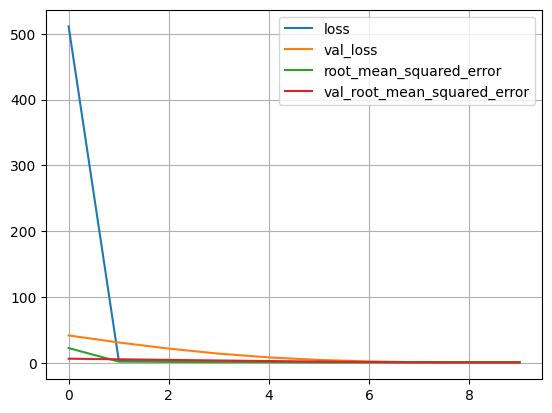

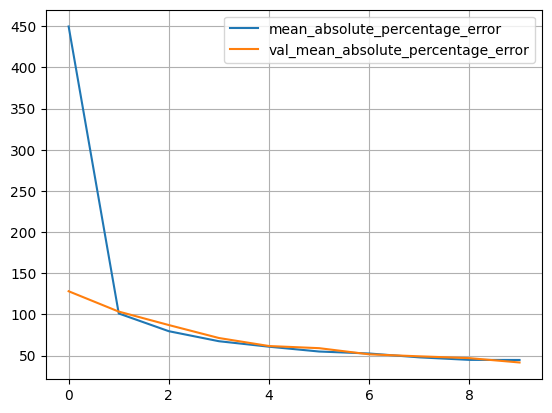

In [16]:
# Importar librerías necesarias
from keras import models, layers, optimizers, metrics
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de viviendas de California
housing = fetch_california_housing()

# Crear conjuntos de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Imprimir
print('X_train:', X_train.shape)
print('X_valid:', X_valid.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_valid:', y_valid.shape)
print('y_test:', y_test.shape)

# Crear el modelo de red neuronal sin estandarización de los datos
model_no_scaling = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(1)
])

# Compilar el modelo
model_no_scaling.compile(loss='mean_squared_error',
                         optimizer='adam',
                         metrics=[metrics.RootMeanSquaredError(),
                                  'mean_absolute_percentage_error'])

# Entrenar el modelo durante 10 épocas junto con los datos de validación
history_no_scaling = model_no_scaling.fit(X_train, y_train,
                                          epochs=10,
                                          validation_data=(X_valid, y_valid))

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model_no_scaling.evaluate(X_test, y_test)
print("Modelo sin estandarización de los datos")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)

# Graficar el historial de entrenamiento
dfHistory_no_scaling = pd.DataFrame(history_no_scaling.history)
dfHistory_no_scaling[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory_no_scaling[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)


#### Experimentar con diferentes arquitecturas de red neuronal, como agregar capas adicionales o cambiar el número de neuronas en cada capa, y observar cómo afectan el rendimiento del modelo:

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2359.4458 - root_mean_squared_error: 48.5741 - mean_absolute_percentage_error: 833.0331 - val_loss: 6.5633 - val_root_mean_squared_error: 2.5619 - val_mean_absolute_percentage_error: 70.6126
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.4397 - root_mean_squared_error: 1.1999 - mean_absolute_percentage_error: 62.0928 - val_loss: 5.3353 - val_root_mean_squared_error: 2.3098 - val_mean_absolute_percentage_error: 53.8865
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 1.2107 - root_mean_squared_error: 1.1003 - mean_absolute_percentage_error: 56.9751 - val_loss: 4.4339 - val_root_mean_squared_error: 2.1057 - val_mean_absolute_percentage_error: 62.9499
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 1.0285 - root_mean_squared_error: 1.0141 - mean_absolute_percentage_error: 52.1219 - val_loss: 3.2519 - val_root_mean_squared_error: 1.8033 -

<Axes: >

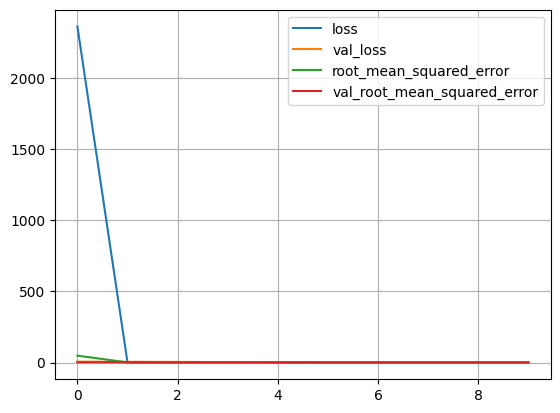

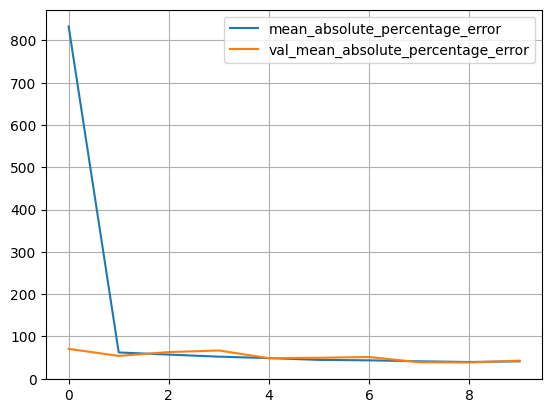

In [17]:
# Crear el modelo de red neuronal de una arquitectura con capas adicionales y diferente número de neuronas
model_complex = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compilar el modelo
model_complex.compile(loss='mean_squared_error',
                      optimizer='adam',
                      metrics=[metrics.RootMeanSquaredError(),
                               'mean_absolute_percentage_error'])

# Entrenar el modelo durante 10 épocas junto con los datos de validación
history_complex = model_complex.fit(X_train, y_train,
                                    epochs=10,
                                    validation_data=(X_valid, y_valid))

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model_complex.evaluate(X_test, y_test)
print("Modelo con arquitectura compleja")
print("Pérdida en el conjunto de prueba:", loss)
print("RMSE en el conjunto de prueba:", RMSE)
print("MAPE en el conjunto de prueba:", MAPE)

# Graficar el historial de entrenamiento
dfHistory_complex = pd.DataFrame(history_complex.history)
dfHistory_complex[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory_complex[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)
